In [2]:
import pandas as pd
import sqlite3
from sqlite3 import Error
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('fivethirtyeight')

## I decided to analyse the Adult data set from https://archive.ics.uci.edu/ml/datasets/Adult   

### The objective of the data set is to determine if one person makes over 50k a year, data from the USA


In [3]:
def create_connection(db_file):
    """ 
    Create a database connection to the SQLite database specified by the db_file
    
    :param db_file: database file
    :return: the Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [4]:
# SUBSTITUTE THIS PATH BY THE CORRECT PATH
database = "C:\BTS_Master\BTS_DataScienceFoundations\Session_3_graded_assignment/adult.db"

# Create a database connection
conn = create_connection(database)

query = "SELECT * FROM adult"
df = pd.read_sql_query(query, conn)

conn.close()

### It's good to start by checking some general info about our data

In [5]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,13.0,United-States,<=50K
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.0,0.0,40.0,United-States,<=50K
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.0,0.0,40.0,United-States,<=50K
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.0,0.0,40.0,Cuba,<=50K


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32562 entries, 0 to 32561
Data columns (total 15 columns):
age               32562 non-null object
workclass         32561 non-null object
fnlwgt            32561 non-null float64
education         32561 non-null object
education_num     32561 non-null float64
marital_status    32561 non-null object
ocupation         32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null float64
capital_loss      32561 non-null float64
hours_week        32561 non-null float64
native_country    32561 non-null object
income            32561 non-null object
dtypes: float64(5), object(10)
memory usage: 3.7+ MB


The age column has one more value than the rest of the features and is a string where it should be an integer as is defined in the database.

### Need to investigate this and correct it before doing anything else

In [7]:
df.age.value_counts()

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
27    835
32    828
38    827
39    816
29    813
41    808
24    798
40    794
26    785
42    780
43    770
22    765
20    753
46    737
45    734
44    724
21    720
19    712
47    708
50    602
     ... 
61    300
62    258
63    230
64    208
65    178
67    151
66    150
68    120
69    108
70     89
71     72
72     67
73     64
74     51
76     46
75     45
90     43
77     29
78     23
79     22
80     22
81     20
82     12
84     10
83      6
88      3
85      3
86      1
87      1
        1
Name: age, Length: 74, dtype: int64

Only one value seems to be missing

In [8]:
df.tail()

,age,workclass,fnlwgt,education,education_num,marital_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income
32557,40,Private,154374.0,HS-grad,9.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
32558,58,Private,151910.0,HS-grad,9.0,Widowed,Adm-clerical,Unmarried,White,Female,0.0,0.0,40.0,United-States,<=50K
32559,22,Private,201490.0,HS-grad,9.0,Never-married,Adm-clerical,Own-child,White,Male,0.0,0.0,20.0,United-States,<=50K
32560,52,Self-emp-inc,287927.0,HS-grad,9.0,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024.0,0.0,40.0,United-States,>50K
32561,,None,NaN,None,NaN,None,None,None,None,None,NaN,NaN,NaN,None,None


#### Here it is, we have one row at the end with empty values, Will just eliminate it and then convert the column Age to integer.

In [9]:
df = df.iloc[:-1]

In [10]:
df['age'] = df['age'].astype(int)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age               32561 non-null int32
workclass         32561 non-null object
fnlwgt            32561 non-null float64
education         32561 non-null object
education_num     32561 non-null float64
marital_status    32561 non-null object
ocupation         32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital_gain      32561 non-null float64
capital_loss      32561 non-null float64
hours_week        32561 non-null float64
native_country    32561 non-null object
income            32561 non-null object
dtypes: float64(5), int32(1), object(9)
memory usage: 3.6+ MB


Everything looks go for now

### I wonder if this is a balanced data set or not?

In [12]:
df.income.value_counts()

<=50K    24720
>50K      7841
Name: income, dtype: int64

Looks like it's not balanced, we have 3 times more adults making less than 50K than the ones making more.

### How are the ages distributed in this data set? At what age people start working and until what age?

In [25]:
print(df.age.min())
print(df.age.max())

17
90


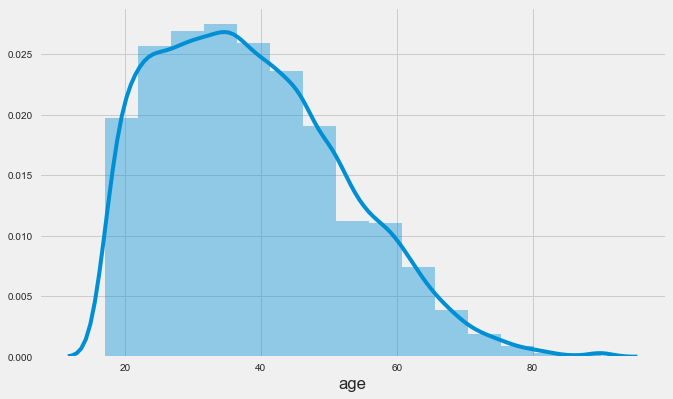

In [26]:
plt.figure(figsize=[10,6])
sns.distplot(df['age'], bins=15)

The youngest age we have here is 17 years old and the largest concentration is between 17 and 50 years old. We still have some adults working until really late in their life, we have a someone working at the age of 90!

### Will create a new column, income_num, transforming the column income into 0 if the income is <=50K and 1 otherwise

In [27]:
df['income_num'] = df['income'].map({'<=50K': 0, '>50K': 1})

### Now lets start by investigating the differences between ocupations, probably some are better paid than others

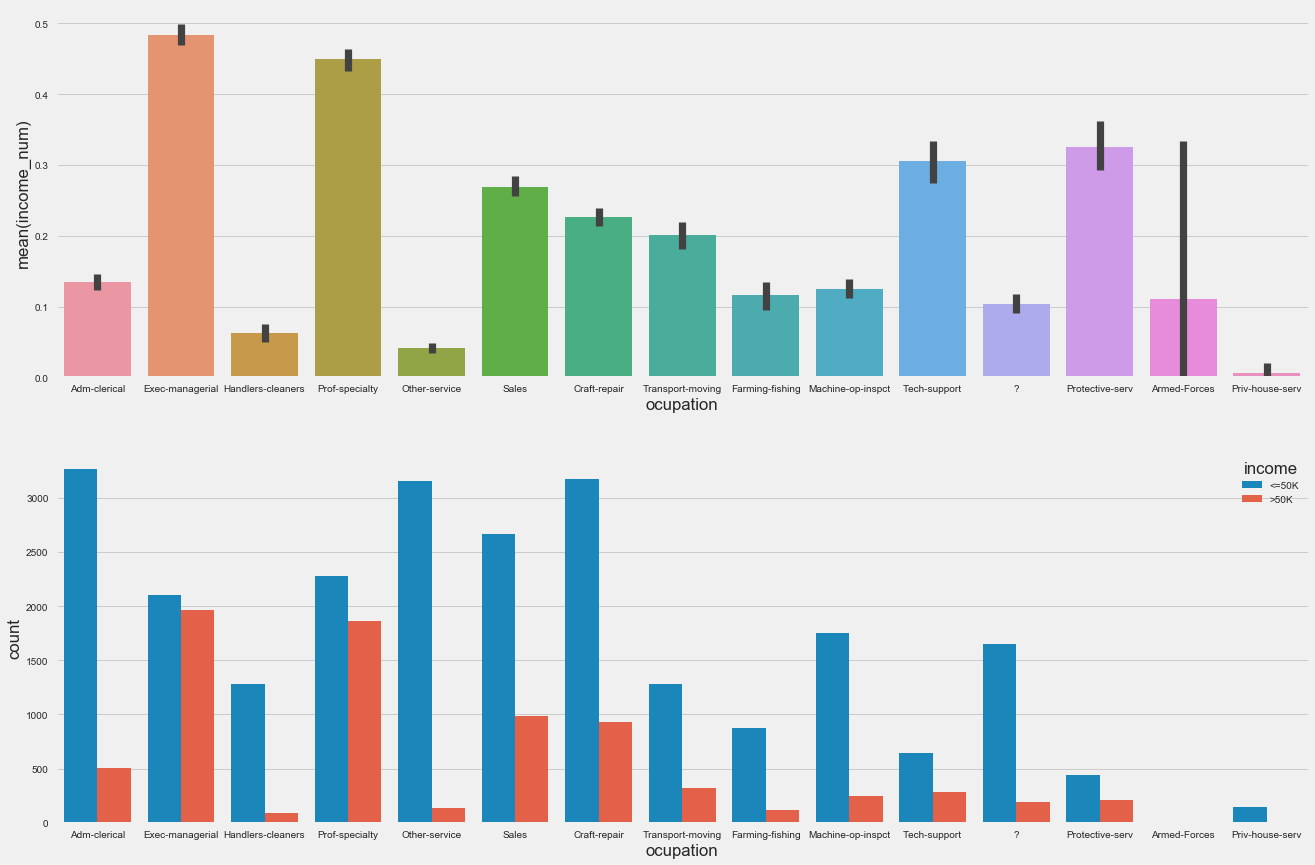

In [28]:
fig, axs = plt.subplots(2,1,  figsize=[20,14])

sns.barplot(x='ocupation', y='income_num', data= df, ax=axs[0])
sns.countplot(x='ocupation', hue='income', data= df, ax=axs[1])

As suspected some professions have a lot more people making more than 50K than others. Exec-Managerial and Prof-speciality have almost equal number of adults in both situations. On the other side the Handlers-cleaners and Other-services barely have anyone making more than 50k.   
We also have a big number of cases with a '?' instead of an ocupation.

### What can we do with the missing values in ocupation?

In [31]:
df[df['ocupation'] == '?']

,age,workclass,fnlwgt,education,education_num,marital_status,ocupation,relationship,race,sex,capital_gain,capital_loss,hours_week,native_country,income,income_num
27,54,?,180211.0,Some-college,10.0,Married-civ-spouse,?,Husband,Asian-Pac-Islander,Male,0.0,0.0,60.0,South,>50K,1
61,32,?,293936.0,7th-8th,4.0,Married-spouse-absent,?,Not-in-family,White,Male,0.0,0.0,40.0,?,<=50K,0
69,25,?,200681.0,Some-college,10.0,Never-married,?,Own-child,White,Male,0.0,0.0,40.0,United-States,<=50K,0
77,67,?,212759.0,10th,6.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,2.0,United-States,<=50K,0
106,17,?,304873.0,10th,6.0,Never-married,?,Own-child,White,Female,34095.0,0.0,32.0,United-States,<=50K,0
128,35,?,129305.0,HS-grad,9.0,Married-civ-spouse,?,Husband,White,Male,0.0,0.0,40.0,United-States,<=50K,0
149,43,?,174662.0,Some-college,10.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,40.0,United-States,<=50K,0
154,52,?,252903.0,HS-grad,9.0,Divorced,?,Not-in-family,White,Male,0.0,0.0,45.0,United-States,>50K,1
160,68,?,38317.0,1st-4th,2.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,20.0,United-States,<=50K,0
187,53,?,135105.0,Bachelors,13.0,Divorced,?,Not-in-family,White,Female,0.0,0.0,50.0,United-States,<=50K,0


In [32]:
df[df['workclass'] == '?'].shape

(1836, 16)

We have 1843 missing values in ocupation almost all of those also have missing values in workclass too. I don't think we can guess their profession so we probably should just drop them.   
The missing values represent 5.66% (1843/32561) of the observations of the data set, we are probably ok if we delete them.   

### Dropping '?' values...

In [39]:
df = df[df['ocupation'] != '?']

In [43]:
df[df['workclass'] == '?'].shape

(0, 16)

In [45]:
df.shape

(30718, 16)

Seems to be correct, and we no longer have '?' in workclass

### Now let's see the difference in income between workclasses

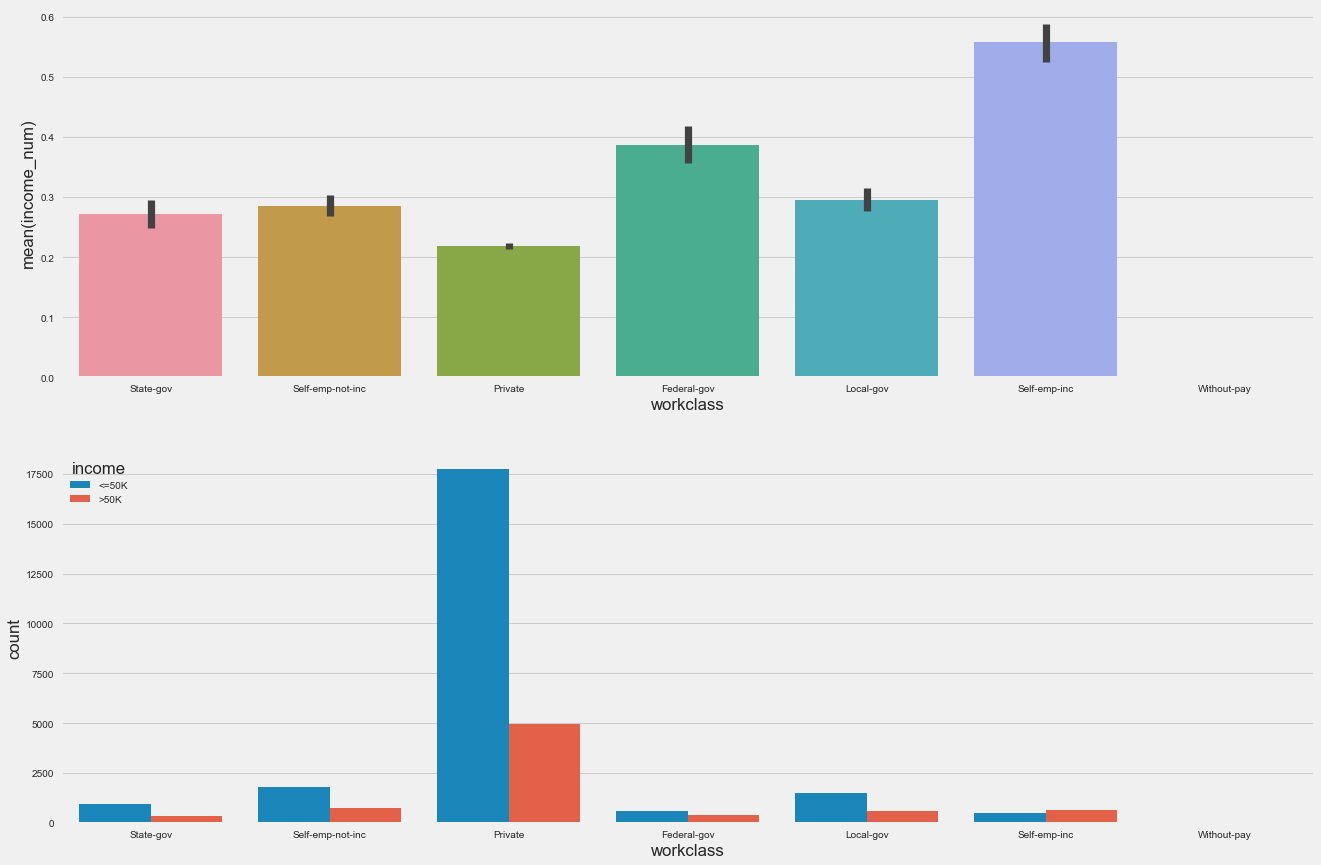

In [46]:
fig, axs = plt.subplots(2,1,  figsize=[20,14])

sns.barplot(x='workclass', y='income_num', data= df, ax=axs[0])
sns.countplot(x='workclass', hue='income', data= df, ax=axs[1])

The largest majority of the adults in our data work for the private sector, but on the private sector only about 20% of adults make more than 50k. Contrast that with the Self employed where we have close to 60% making more than 50k.

### This difference probably comes, at least in part, from the different professions, lets see more detailed information

In [61]:
df[['workclass', 'ocupation', 'income_num']].groupby(['workclass', 'ocupation']).count().loc[['Self-emp-inc', 'Private']]

income_num
workclass    ocupation                    
Private      Adm-clerical             2833
             Craft-repair             3195
             Exec-managerial          2691
             Farming-fishing           455
             Handlers-cleaners        1273
             Machine-op-inspct        1913
             Other-service            2740
             Priv-house-serv           149
             Prof-specialty           2313
             Protective-serv           190
             Sales                    2942
             Tech-support              736
             Transport-moving         1266
Self-emp-inc Adm-clerical               31
             Craft-repair              106
             Exec-managerial           400
             Farming-fishing            51
             Handlers-cleaners           2
             Machine-op-inspct          13
             Other-service              27
             Prof-specialty            160
             Protective-serv             5
             Sales                     291
             Tech-support                3
             Transport-moving           27

As we can see the self employed tend to have professions with better probability of making more than 50k like 'Exec-managerial', and almost none of them works in profession like 'Adm-clerical', 'Handlers-cleaners' or 'Other-service' that have the lowest numbers of adults making more than 50k as we saw above.

### Next feature that also have a lot influence in the salary is Education

#### first will group together anyone who didn't finish HS : Preschool, 1st- 4th, 5th-6th, 7th-8th, 9th, 10th, 11th and 12th.

In [66]:
def edu(education):
    lis = ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']
    if education in lis:
        return 'No HS'
    else:
        return education

In [67]:
df['education_2'] = df['education'].apply(edu)

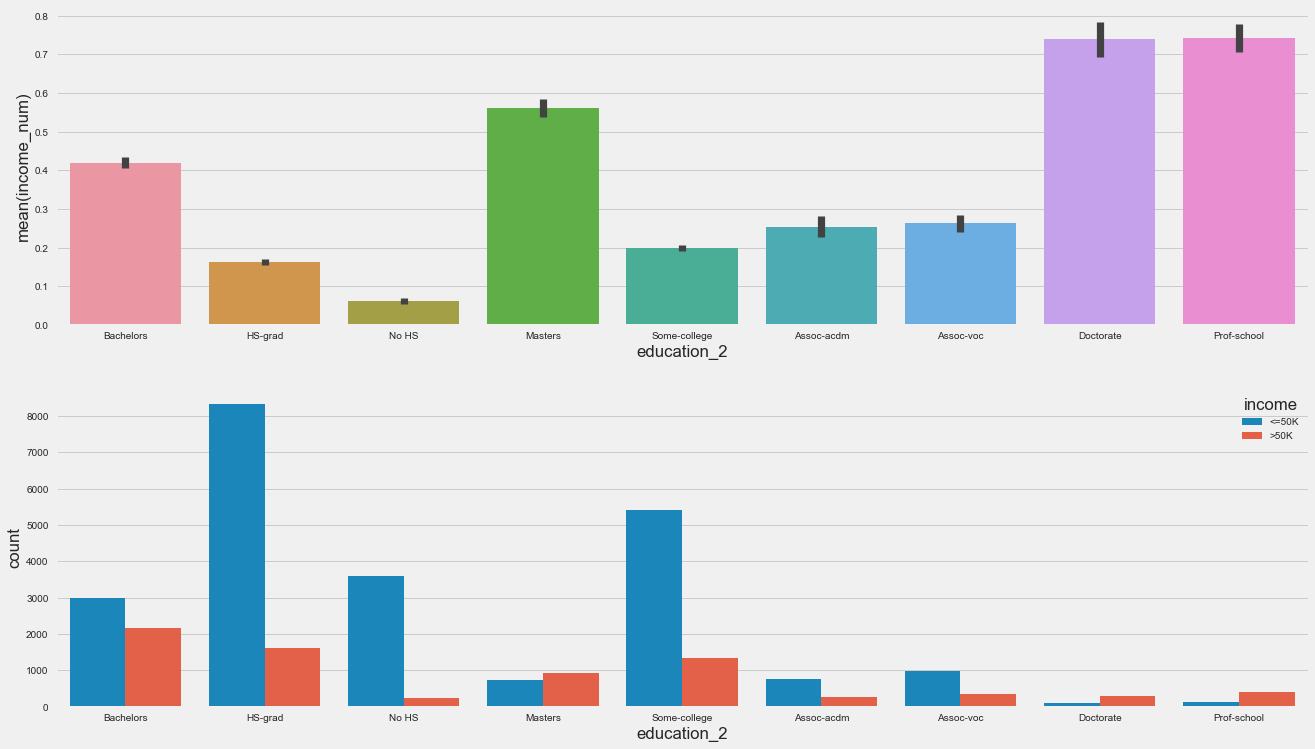

In [69]:
fig, axs = plt.subplots(2,1, figsize=[20,12])


sns.barplot(x='education_2', y='income_num', data= df, ax=axs[0])
sns.countplot(x='education_2', hue='income', data=df, ax= axs[1])

We can see that the education level influences a lot the probablity of making more than 50k. Anyone with a Doctorate degree or prof-school has close to 75% probablity of making more than 50k, but the number of adults with those degrees is really small. Most have finished HS or some college, but those only have 20% or less probablity of earning more than 50k. We can see that only a bachelors increases your chances to more than 40% and a masters to close to 60%.

### Does the sex also influences the income?

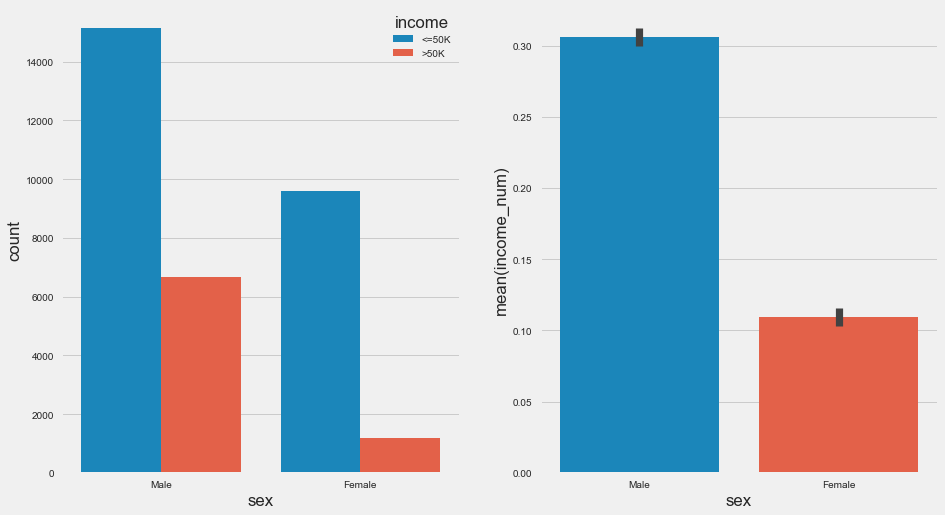

In [132]:
fig, axs = plt.subplots(1,2, figsize=[14,8])

sns.countplot(x='sex', hue='income', data=df, ax=axs[0])
sns.barplot(x='sex', y='income_num', data= df, ax=axs[1])

It shouldn't influence but looks like mens have 3 times more chances of earning more than 50k compared to women.

### Can this difference be explained by Education?

In [73]:
df[['sex', 'income_num', 'education_2']].groupby(['education_2', 'sex']).mean()

income_num
education_2  sex               
Assoc-acdm   Female    0.134663
             Male      0.331179
Assoc-voc    Female    0.132321
             Male      0.333721
Bachelors    Female    0.207474
             Male      0.510744
Doctorate    Female    0.588235
             Male      0.782748
HS-grad      Female    0.068702
             Male      0.207063
Masters      Female    0.334615
             Male      0.664069
No HS        Female    0.018437
             Male      0.079791
Prof-school  Female    0.471910
             Male      0.795309
Some-college Female    0.073651
             Male      0.275024

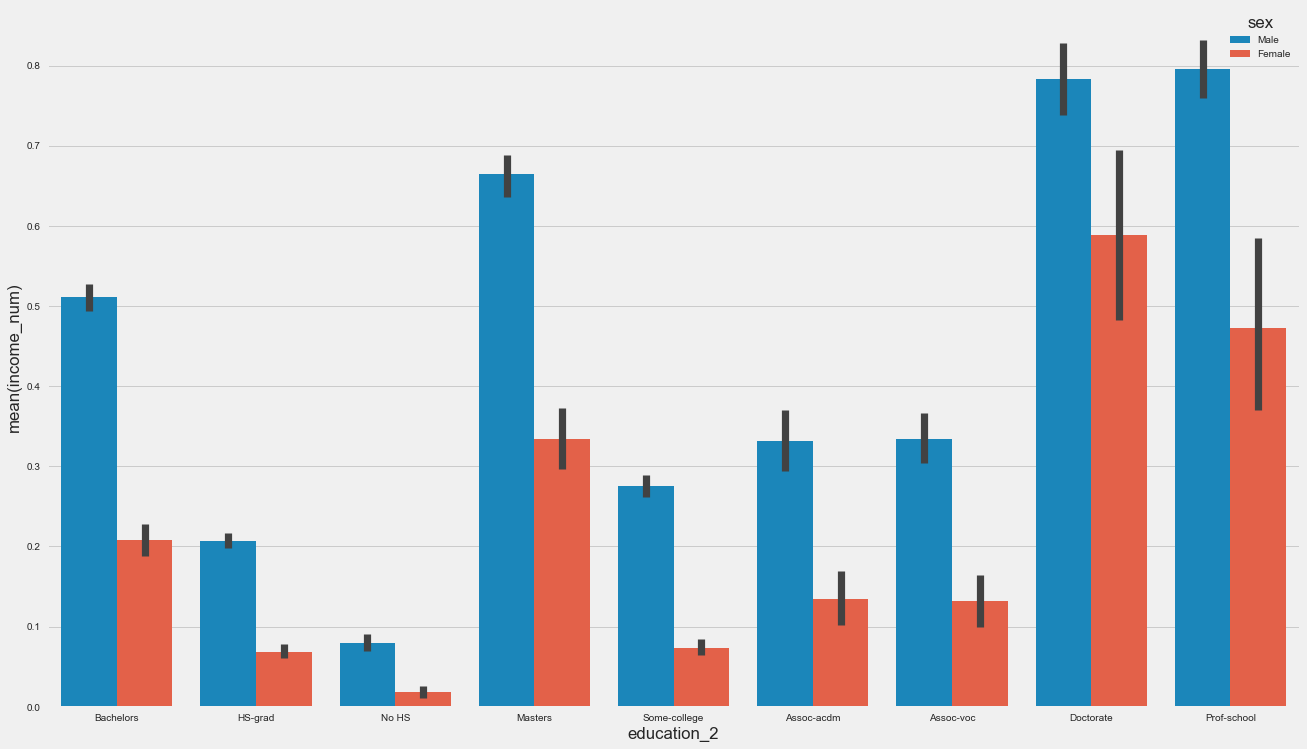

In [74]:
plt.figure(figsize=[20,12])
sns.barplot(x='education_2', y='income_num', hue='sex', data=df)

We see that there are still big differences between men and women even if we control for education. For every level of education being man gives and advantage in the income. We can also see that for higher levels of education the gap becomes smaller, in percentage, for Doctorates we have 0.78 compared to 0.58, for masters we have 0.66 compared to 0.33 and for no HS we have 0.08 compared to 0.02.

### Can the difference between sexes be explained by the different ocupations?

In [75]:
df[['sex', 'income_num', 'ocupation']].groupby(['ocupation', 'sex']).mean()

income_num
ocupation         sex               
Adm-clerical      Female    0.083563
                  Male      0.239254
Armed-Forces      Male      0.111111
Craft-repair      Female    0.090090
                  Male      0.234460
Exec-managerial   Female    0.241588
                  Male      0.580667
Farming-fishing   Female    0.030769
                  Male      0.121636
Handlers-cleaners Female    0.024390
                  Male      0.067993
Machine-op-inspct Female    0.036364
                  Male      0.158402
Other-service     Female    0.028333
                  Male      0.057525
Priv-house-serv   Female    0.007092
                  Male      0.000000
Prof-specialty    Female    0.254125
                  Male      0.561524
Protective-serv   Female    0.131579
                  Male      0.350785
Sales             Female    0.069675
                  Male      0.374948
Tech-support      Female    0.129310
                  Male      0.410345
Transport-moving  Female    0.100000
                  Male      0.206370

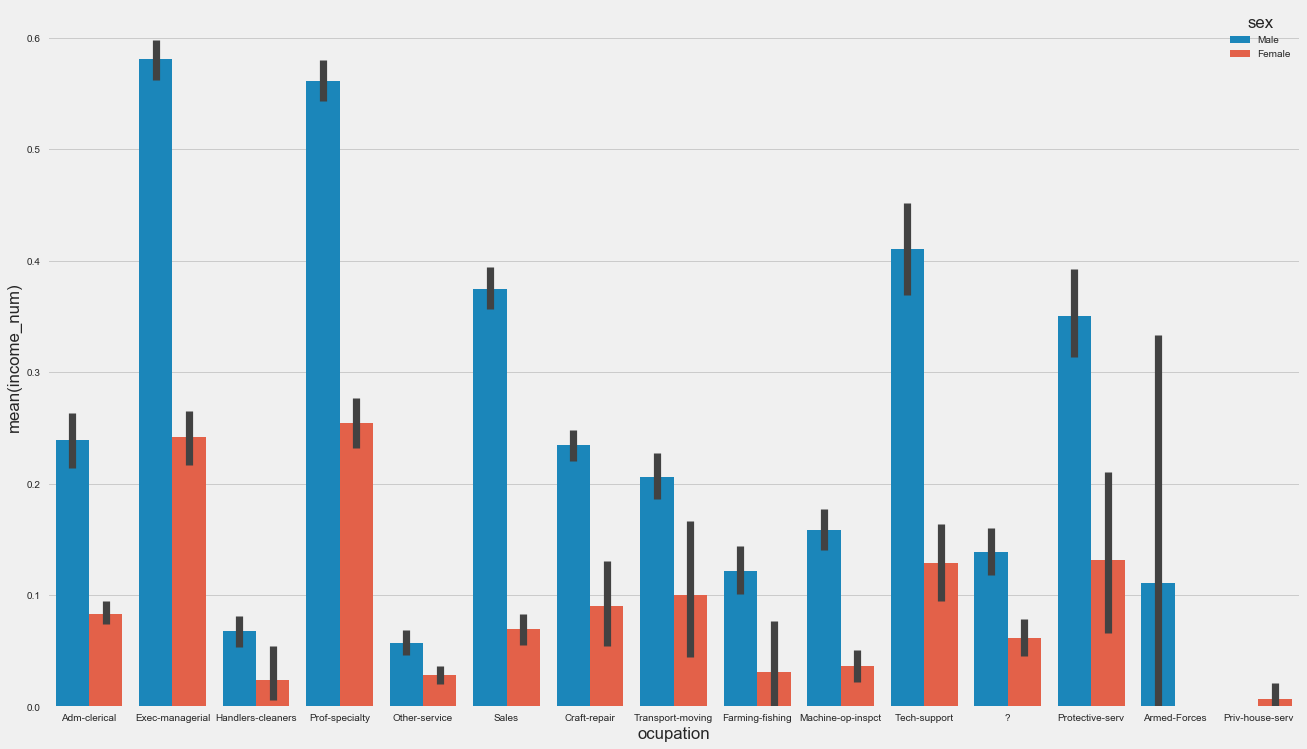

In [134]:
plt.figure(figsize=[20,12])
sns.barplot(x='ocupation', y='income_num', hue='sex', data=df)

Once again we see a difference everywere even when controling for ocupation.

### Maybe the number of hours worked is different?

In [104]:
df[['sex', 'hours_week']].groupby('sex').mean()

,hours_week
sex,
Female,36.410361
Male,42.428086


In [77]:
df[['sex', 'hours_week', 'education_2']].groupby(['education_2', 'sex']).mean()

hours_week
education_2  sex               
Assoc-acdm   Female   37.937656
             Male     43.250404
Assoc-voc    Female   38.529284
             Male     43.810465
Bachelors    Female   39.661082
             Male     44.362534
Doctorate    Female   47.800000
             Male     47.584665
HS-grad      Female   37.118321
             Male     42.844812
Masters      Female   41.371154
             Male     45.457143
No HS        Female   32.433714
             Male     39.137211
Prof-school  Female   45.235955
             Male     48.571429
Some-college Female   35.129185
             Male     42.000472

There is a difference of 6 hours in average, but it is not enough to explain the huge difference we found.

### Let's try to see everything together, ocupation, sex, hours, education and income

In [83]:
df.groupby(['ocupation', 'sex']).agg({'age':'mean', 'hours_week':'mean', 'education_num':'mean', 'income_num':'mean'})[['age','hours_week','education_num', 'income_num']].reset_index()

,ocupation,sex,age,hours_week,education_num,income_num
0,Adm-clerical,Female,36.852188,36.741033,9.996453,0.083563
1,Adm-clerical,Male,37.195458,39.240065,10.354420,0.239254
2,Armed-Forces,Male,30.222222,40.666667,10.111111,0.111111
3,Craft-repair,Female,39.004505,39.869369,9.225225,0.090090
4,Craft-repair,Male,39.033015,42.443642,9.104204,0.234460
5,Exec-managerial,Female,39.485764,41.517688,11.154443,0.241588
6,Exec-managerial,Male,43.239078,46.371173,11.566563,0.580667
7,Farming-fishing,Female,41.092308,37.784615,8.569231,0.030769
8,Farming-fishing,Male,41.219591,47.634015,8.611410,0.121636
9,Handlers-cleaners,Female,34.554878,36.103659,8.609756,0.024390


Resuming: for each ocupation mens tend to work more hours, it can be a difference as big as 10 hours more or as small as 2 hours more. Mens also usually have a higher level of education for each ocupation but the difference is so small that it can be ignored. And men have a lot more probability of making >50k compared to women, this difference can't be explained only by the difference in hours worked.   

### What kind of marital status do we have?

In [159]:
df['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

### What kind of relationships do we have?

In [160]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

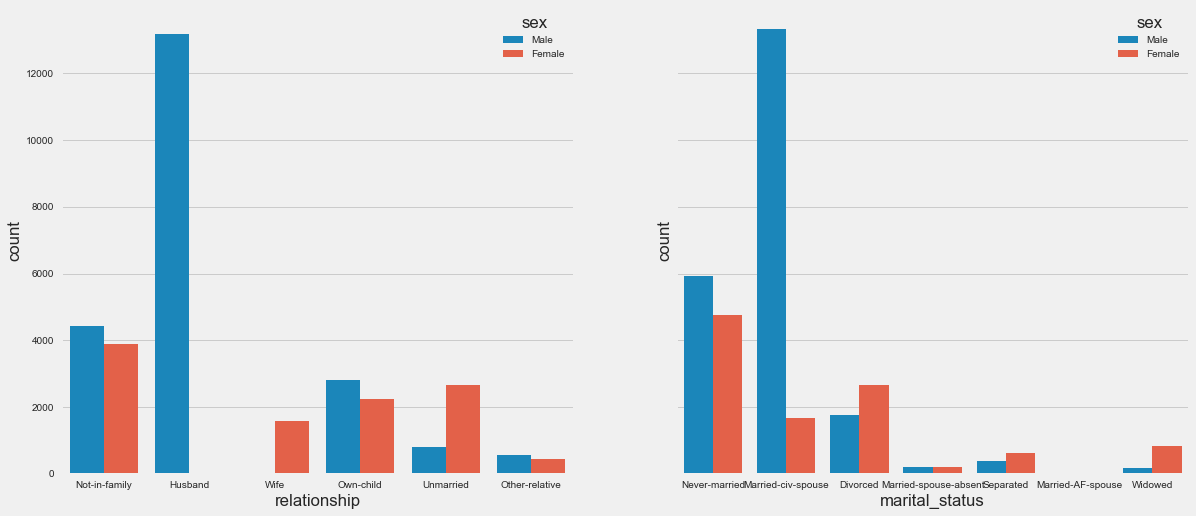

In [164]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=[18,8])

sns.countplot(x='relationship', hue='sex', data=df, ax=axs[0])
sns.countplot(x='marital_status', hue='sex', data=df, ax=axs[1])

Most people are married but the values of 'Not-in-family' are also quite high.

### Do single people work more hours?

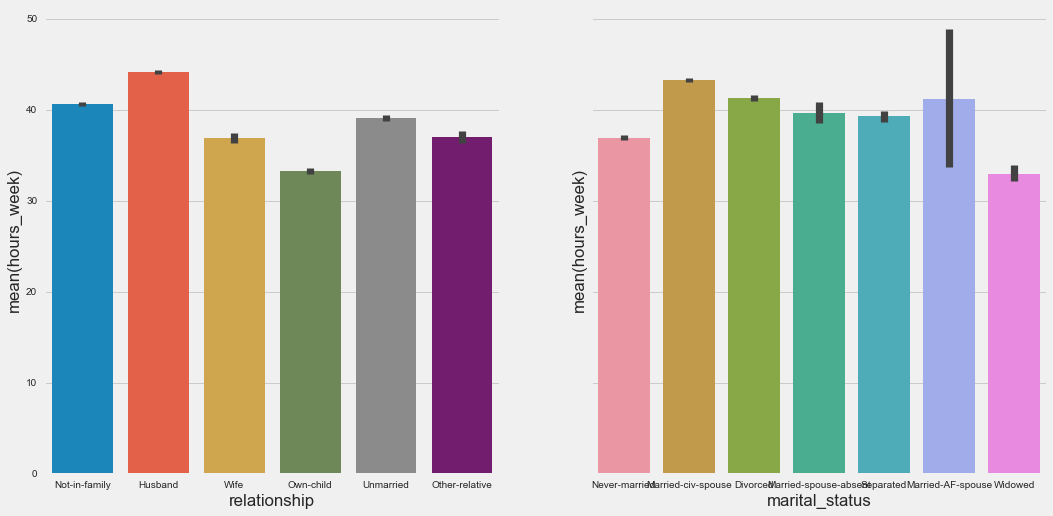

In [158]:
fig, axs = plt.subplots(1,2, sharey=True, figsize=[16,8])

sns.barplot(x='relationship', y='hours_week', data=df, ax=axs[0])
sns.barplot(x='marital_status', y='hours_week', data=df, ax=axs[1])

Not really, married people tend to work more, more specific, husbands tend to work more. Adults with childs tend to work less, the rest seem to be around the same values.

### Are there differences in income by marital status?

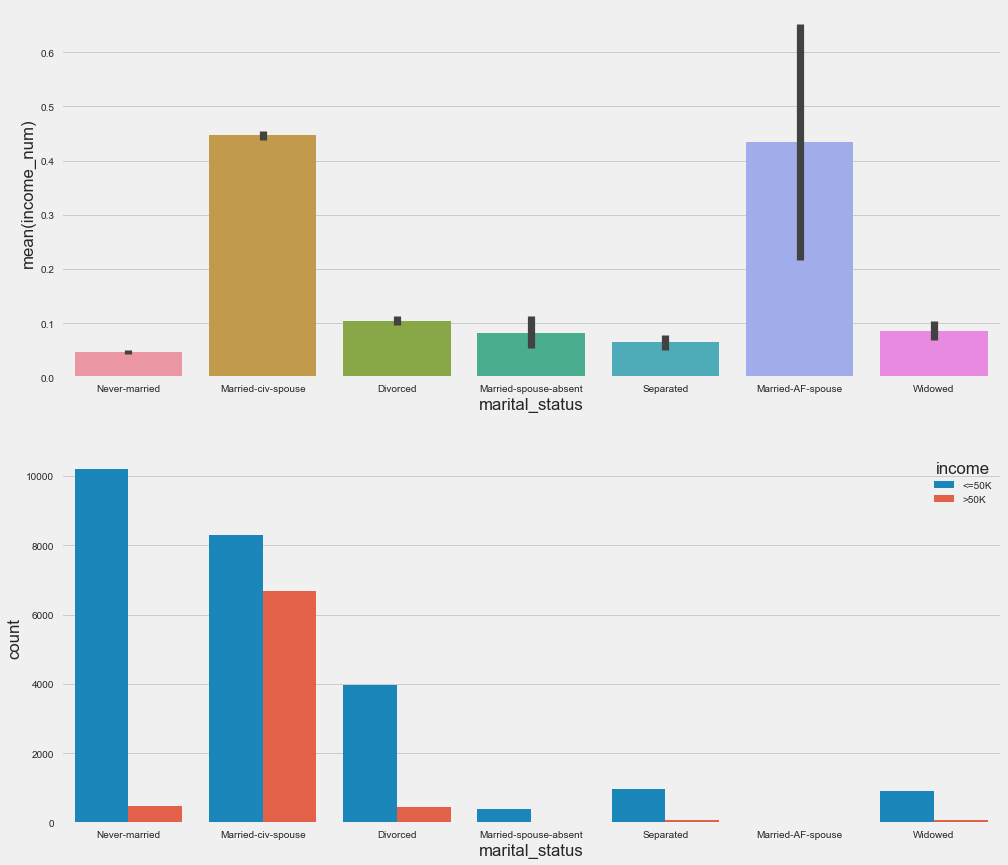

In [162]:
fig, axs = plt.subplots(2,1,  figsize=[15,14])

sns.barplot(x='marital_status', y='income_num', data= df, ax=axs[0])
sns.countplot(x='marital_status', hue='income', data=df, ax= axs[1])

Married have a lot more chances of making >50k, this is probably explained by other factors and not just for the fact of being married.

### Are there any other correlations between variables? Let's see a correlation matrix

In [85]:
df.corr()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_week,income_num
age,1.000000,-0.076540,0.043567,0.080392,0.060409,0.101879,0.242431
fnlwgt,-0.076540,1.000000,-0.043509,-0.000189,-0.010011,-0.022810,-0.009446
education_num,0.043567,-0.043509,1.000000,0.124247,0.079321,0.151241,0.334640
capital_gain,0.080392,-0.000189,0.124247,1.000000,-0.032332,0.079548,0.221871
capital_loss,0.060409,-0.010011,0.079321,-0.032332,1.000000,0.053961,0.151461
hours_week,0.101879,-0.022810,0.151241,0.079548,0.053961,1.000000,0.228547
income_num,0.242431,-0.009446,0.334640,0.221871,0.151461,0.228547,1.000000


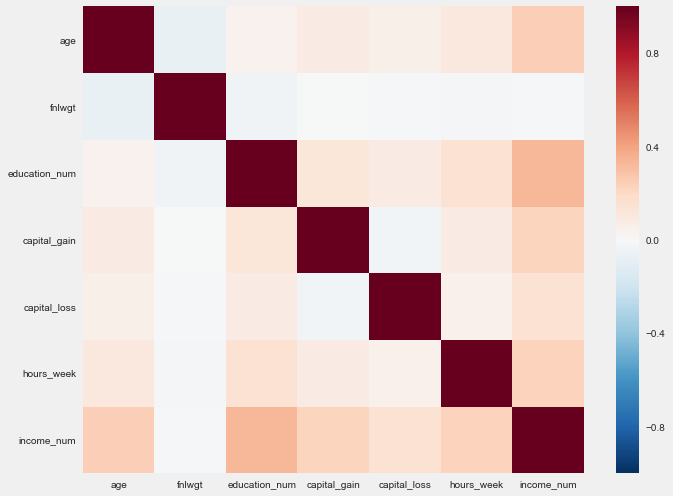

In [86]:
plt.figure(figsize=[10,8])
sns.heatmap(df.corr())

We already saw the positive correlation between income and education. We are missing the ones between income and age and income and hours worked, the correlation is not very strong but lets look at it.

### Let's look at age, will divide the age in bins first

In [169]:
df['age_bins'] = pd.cut(df['age'], 10)

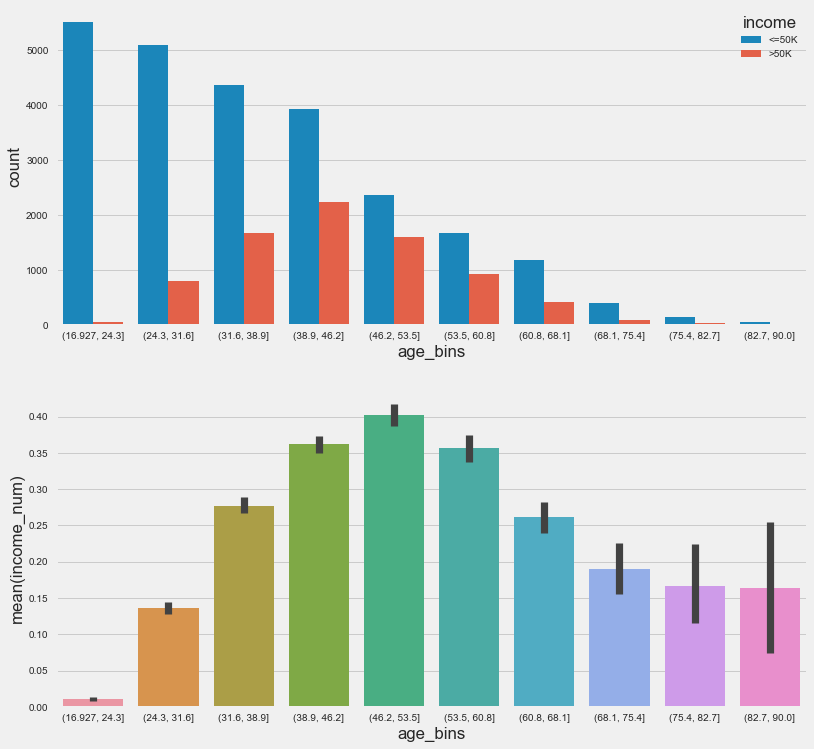

In [176]:
fig, axs = plt.subplots(2,1, figsize=[12,12])

sns.countplot(x='age_bins', hue='income', data=df, ax=axs[0])
sns.barplot(x='age_bins', y='income_num', data=df, ax=axs[1])

We can see that between the ages of 39 and 60 is where we find adults with higher probability of making more than 50k. After that the total observations are a lot smaller and before that i guess most people are too young to reach the point in their carrer to earn those wages.

### At which age people work more?

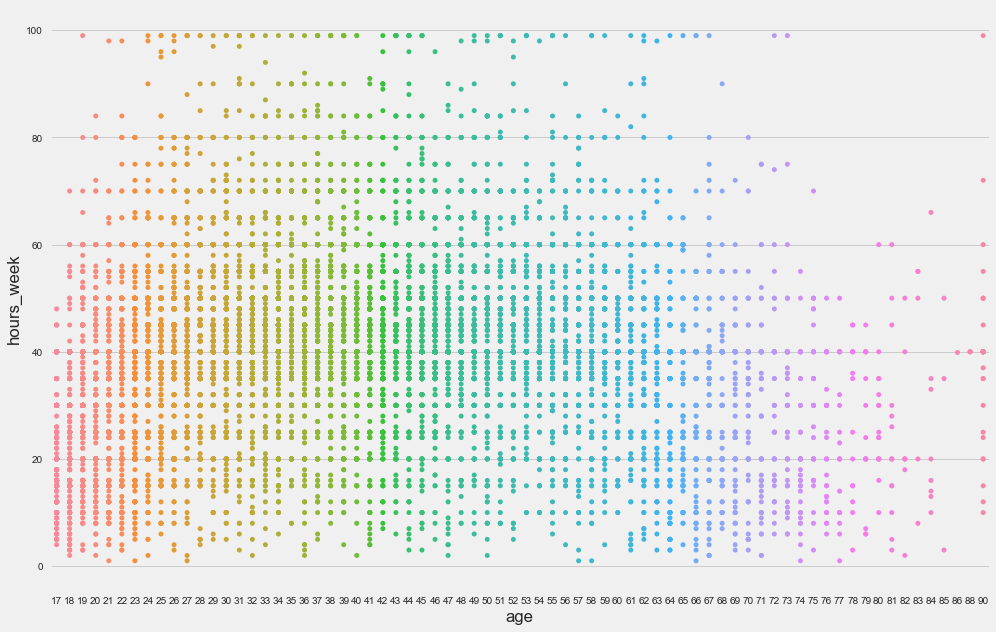

In [76]:
plt.figure(figsize=[15,10])
sns.stripplot(x='age', y='hours_week', data=df)

It's hard to see a correlation, maybe it doesn't exist

### Let's see now the correlation between income and hours worked

In [78]:
df['hours_bins'] = pd.cut(df['hours_week'], 10)

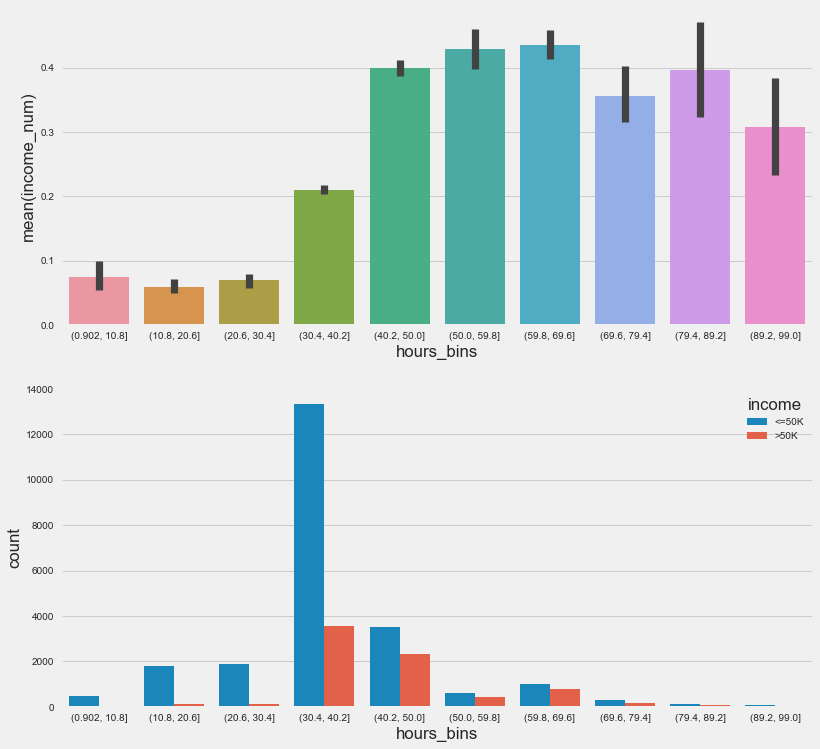

In [79]:
fig, axs = plt.subplots(2,1,  figsize=[12,12])

sns.barplot(x='hours_bins', y='income_num', data=df, ax=axs[0])
sns.countplot(x='hours_bins', hue='income', data=df, ax=axs[1])

Working more than 40 hours weekly seems to be a good idea for anyone who wants to make >50k. Most work between 30 and 40 hours but that only gives you a 20% chance of making >50k compared with working between 40 and 50 hours with a 40% chance.

### There is probably also a difference in hours worked depending on your profession and workclass?

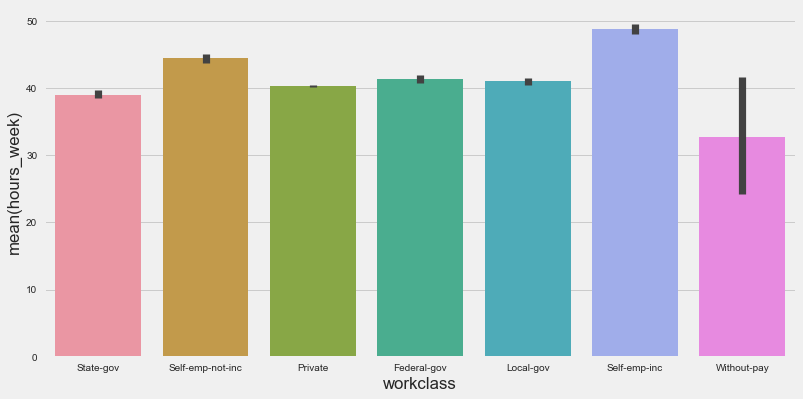

In [93]:
plt.figure(figsize=[12,6])

sns.barplot(x='workclass', y='hours_week', data=df)

The self employed tend to work a more hours than any other type of workclass, looks like that also helps explaining why they usually have higher incomes

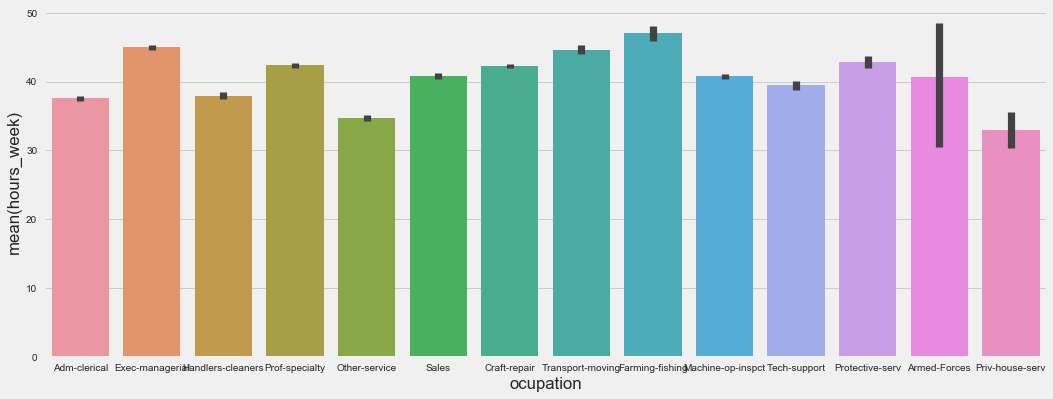

In [95]:
plt.figure(figsize=[16,6])
sns.barplot(x='ocupation', y='hours_week', data=df)

Its harder to see a clear tendency here, in one side we have the 'Exec-managerial' that works more hours and that helps them with the better incomes, in the other side we have 'Farming-fishing', that work even more hours but that don't give them good chances of making >50k.

### If we need to make predictions we probably need to tranform some features to numeric values for example:

In [105]:
# Workclass
work= {'State-gov': 1, 'Self-emp-not-inc': 2, 'Private': 3, 'Federal-gov': 4,'Local-gov': 5, 'Self-emp-inc': 5, 'Without-pay': 6}

df['workclass_num'] = df['workclass'].map(work)

# ocupation
ocup = {'Adm-clerical': 1, 'Exec-managerial': 2, 'Handlers-cleaners': 3,
       'Prof-specialty': 4, 'Other-service': 5, 'Sales': 6, 'Craft-repair': 7,
       'Transport-moving': 8, 'Farming-fishing': 9, 'Machine-op-inspct': 10,
       'Tech-support': 11, 'Protective-serv': 12, 'Armed-Forces': 13, 'Priv-house-serv': 14}

df['ocupation_num'] = df['ocupation'].map(ocup)

# and sex:
df['sex_num'] = df['sex'].map({'Male': 0, 'Female': 1})

In [106]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,ocupation,relationship,race,sex,...,capital_loss,hours_week,native_country,income,income_num,education_2,hours_bins,workclass_num,ocupation_num,sex_num
0,39,State-gov,77516.0,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,...,0.0,40.0,United-States,<=50K,0,Bachelors,"(30.4, 40.2]",1,1,0
1,50,Self-emp-not-inc,83311.0,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0.0,13.0,United-States,<=50K,0,Bachelors,"(10.8, 20.6]",2,2,0
2,38,Private,215646.0,HS-grad,9.0,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0.0,40.0,United-States,<=50K,0,HS-grad,"(30.4, 40.2]",3,3,0
3,53,Private,234721.0,11th,7.0,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0.0,40.0,United-States,<=50K,0,No HS,"(30.4, 40.2]",3,3,0
4,28,Private,338409.0,Bachelors,13.0,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0.0,40.0,Cuba,<=50K,0,Bachelors,"(30.4, 40.2]",3,4,1


### We have to consider that this data doesn't tell us anything about the actual values of the income or the distribuition of those values so we have to be carefull with the conclusions. The values could be really close to 50k or really far, they could be concentrated around certain values or very disperse, all that could change the conclusions.

And that's it.   
There are some things that could probably be improved, any suggestion/feedback is welcome